<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/Maths/Calculus_2_Partial_Derivatives_and_Integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradients Applied to Machine Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

In [ ]:
def f(my_x,my_y):
  return my_x**2 - my_y**2

In [ ]:
xs = np.linspace(-3,3,1000)

While holding y as constant let 0

In [ ]:
z_wrt_x = f(xs,0)

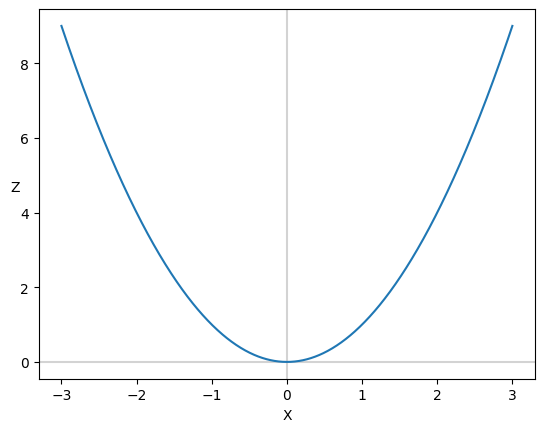

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')
plt.xlabel('X')
plt.ylabel('Z',rotation=0)
ax.plot(xs,z_wrt_x)


To determine the slope of the function z w.r.to x the particial derivative of this function with respect to x is 2x

In [ ]:
def delz_delx(my_x,my_y):
  return 2*my_x

In [ ]:
sample_x = [-2,-1,0,1,2]

In [ ]:
colors=['red','blue','green','orange','purple']

In [ ]:
def tangent_at_point_wrto_x(my_xs,my_x,my_y,my_f,fprime,col):
  my_z = my_f(my_x,my_y)
  plt.scatter(my_x,my_z,c=col,zorder=3)

  tangent_m = fprime(my_x,my_y) #Slope is the partial derivative of x with respect to y
  tangent_b = my_z - tangent_m*my_x
  tangent_line = tangent_m*my_xs + tangent_b
  plt.plot(my_xs,tangent_line,c=col,linestyle='dashed',linewidth=0.7,zorder=3)

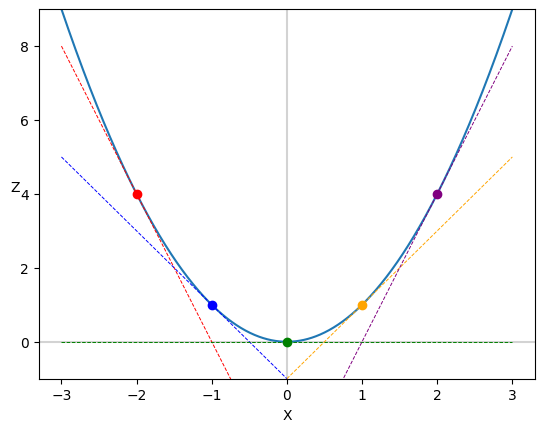

In [ ]:
fig, ax = plt.subplots()

plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')

for i,x in enumerate(sample_x):
  tangent_at_point_wrto_x(xs,x,0,f,delz_delx,colors[i])

plt.xlabel('X')
plt.ylabel('Z',rotation=0)
plt.ylim(-1,9)
ax.plot(xs,z_wrt_x)

Partial derivative with respect to y

In [ ]:
ys = np.linspace(-3,3,1000)

In [ ]:
z_wrt_y = f(0,ys)

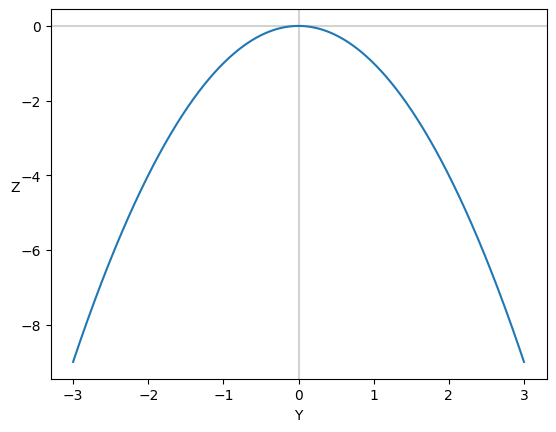

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')
plt.xlabel('Y')
plt.ylabel('Z',rotation=0)
ax.plot(ys,z_wrt_y)

Now hold the value x as constant for getting partial derivative which doesn't put any impact of z w.r.to y

In [ ]:
z_wrt_y = f(2,ys)

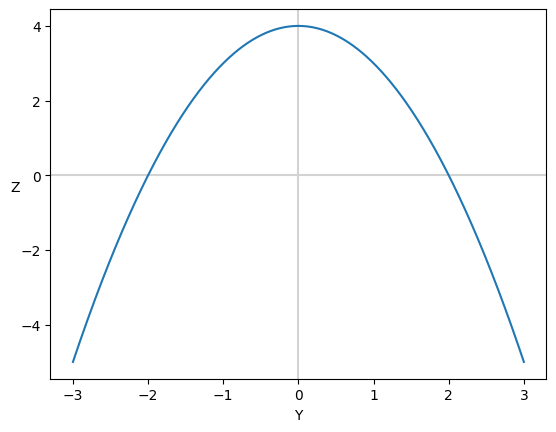

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')
plt.xlabel('Y')
plt.ylabel('Z',rotation=0)
ax.plot(ys,z_wrt_y)

In [ ]:
def  delz_dely(my_x,my_y):
  return -2*my_y

In [ ]:
# Lets take sample points were we find the slope/tangent at that points
sample_y = [-2,-1,0,1,2]

In [ ]:
def tangent_at_point_wrt_y(my_ys,my_x,my_y,my_f,fprime,col):
  my_z = my_f(my_x,my_y)
  plt.scatter(my_y,my_z,c=col,zorder=3)

  tangent_m = fprime(my_x,my_y)
  tangent_b = my_z - tangent_m*my_y
  tangent_line = tangent_m*my_ys + tangent_b
  plt.plot(my_ys,tangent_line,c=col,linestyle='dashed',linewidth=0.7,zorder=3)

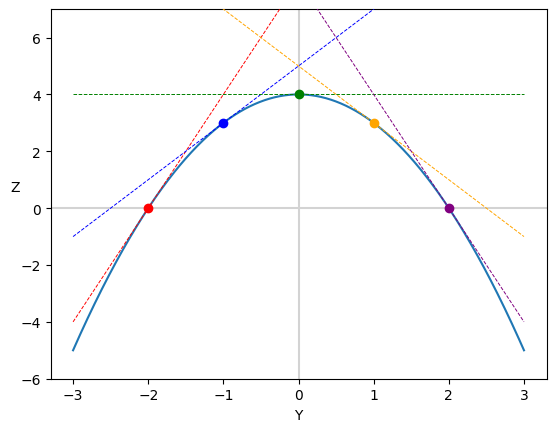

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')

for i,y in enumerate(sample_y):
  tangent_at_point_wrt_y(ys,2,y,f,delz_dely,colors[i])

plt.xlabel('Y')
plt.ylabel('Z',rotation=0)
plt.ylim(-6,7)
ax.plot(ys,z_wrt_y)

In [ ]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [ ]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [ ]:
z = f(x,y) # Forward Pass
z

tensor(0., grad_fn=<SubBackward0>)

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(0.)

In [ ]:
y.grad

tensor(-0.)

### Partial Derivative of a Cylinder volume

In [ ]:
def cylinder_volume(r,l):
  return math.pi * r**2 * l

In [ ]:
r = torch.tensor(3.0).requires_grad_()
r

tensor(3., requires_grad=True)

In [ ]:
l = torch.tensor(7.).requires_grad_()
l

tensor(7., requires_grad=True)

In [ ]:
v = cylinder_volume(r,l)
v

tensor(197.9203, grad_fn=<MulBackward0>)

In [ ]:
v.backward()

In [ ]:
l.grad

tensor(28.2743)

This means that with thae radius = 3 units, a change in length l by one units results a change in volume by 28.3 units**3

In [ ]:
math.pi * 3**2

28.274333882308138

In [ ]:
cylinder_volume(3,5)-cylinder_volume(3,4)

28.27433388230814

In [ ]:
cylinder_volume(3,2)-cylinder_volume(3,1)

28.274333882308138

Partial differentiation woth respect to the radius

In [ ]:
r.grad

tensor(131.9469)

In [ ]:
2* math.pi * 3 * 7

131.94689145077132

AS r is included in the partial derivative it is true for only the small infinitesimal chage in r

In [ ]:
delta = 0.000001
delta

1e-06

In [ ]:
(cylinder_volume(r+delta,l) - cylinder_volume(r,l))/delta

tensor(137.3291, grad_fn=<DivBackward0>)

## Gradient of Cost w.r.to Model parameters

In this we calculate the gradient of the quadratic cost  with respect to a straight line regression model's parameters.We keep the partial derivatives as simple as possible by limiting the model to handling a single data point.

In [ ]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])

In [ ]:
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

The equation of the line is given by y = mx+b
where m is the slope and b is the intercept

In [ ]:
def regression(x,m,b):
  return m*x + b

Lets initialize the the variables slope and intercept randomly near 0 values

In [ ]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [ ]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

For making the partial derivatives as simple let's move to a point let's "7"

In [ ]:
i = 7
x = xs[i]
y = ys[i]

In [ ]:
x

tensor(7.)

In [ ]:
y

tensor(-1.3700)

**Step 1** : Forward pass

In [ ]:
yhat = regression(x,m,b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

**Step 2**: Compare yhat and y to calculate the Cost C
With a single data point we can use quadratic cost alone . It is defined as
        C = (yhat-y)**2

In [ ]:
def squared_error(yhat,y):
  return (yhat-y)**2

In [ ]:
C = squared_error(yhat,y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

**Step 3**: Use Pytorch Autodiff to calculate the gradient of C w.r.to parameters

In [ ]:
C.backward()

In [ ]:
m.grad   # Partial derivative with respect to m

tensor([108.7800])

In [ ]:
b.grad # PArtial derivative w.r.to b

tensor([15.5400])

From the theory of Partial Derivatives

In [ ]:
2*x*(yhat.item()-y)   # Partial derivative of C with respect to m

tensor(108.7800)

In [ ]:
2*(yhat.item()-y)

tensor(15.5400)

## The Gradient of the Cost, ∇C
The gradient of the cost C i.e ∇C (nabla C) is the vector of the all the partial derivatives of C with all the model parameters. It is a column  matrix
    https://chatgpt.com/c/3a253a49-30b9-4754-baaa-866d810da479

In [ ]:
gradient = torch.tensor([[m.grad.item(),b.grad.item()]]).T
gradient

tensor([[108.7800],
        [ 15.5400]])

## Gradient of Cost on a Batch of Data
- Calculate the mean squarred error for a batch of Data
- Visualize the gradient in action

In [ ]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [ ]:
def regression(x,m,b):
  return m*x + b

In [ ]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1**:Forward Pass

In [ ]:
yhat = regression(xs,m,b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**:Compares yhat and the actual/true y for calculating the code


In [ ]:
def mse(yhat,y):
  sigma = torch.sum((yhat-y)**2)
  return sigma/len(y)

In [ ]:
C = mse(yhat,ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use AutoDiff to calculate the gradient of C with respect to the parameters

In [ ]:
C.backward()

In [ ]:
m.grad

tensor([36.3050])

In [ ]:
b.grad

tensor([6.2650])

By manually the partial derivatives of Cot with respect to parameters are:

In [ ]:
# Gradient of C with respect to m
(2/len(ys))*torch.sum((yhat-ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

In [ ]:
# dradient of C with respect to the b
(2/len(ys))*torch.sum((yhat-ys))

tensor(6.2650, grad_fn=<MulBackward0>)

In [ ]:
gradient = torch.tensor([[b.grad.item(),m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

In [ ]:
def labelled_regression_plot(my_x,my_y,my_m,my_b,my_C,include_grad=True):
  title = "Cost = {}".format('%.3g' % my_C.item())
  if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
  else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

  fig, ax = plt.subplots()

  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)

  ax.scatter(my_x,my_y,zorder=3)

  x_min,x_max = ax.get_xlim()
  y_min,y_max = x_min*my_m.item() + my_b.item(), x_max*my_m.item() + my_b.item()
  ax.set_xlim(x_min,x_max)
  ax.plot([x_min,x_max],[y_min,y_max],c='red',zorder=2)

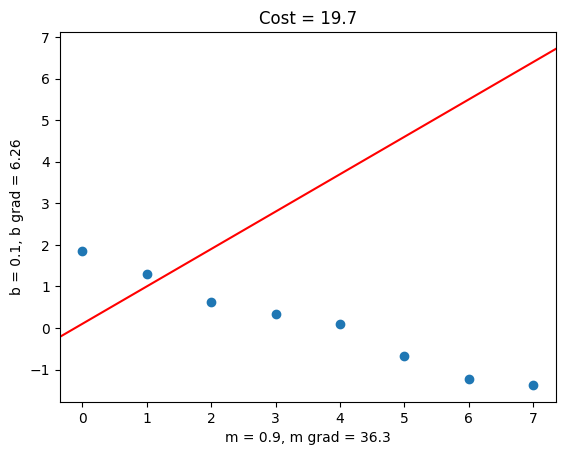

In [ ]:
labelled_regression_plot(xs,ys,m,b,C)

This indocates the Cost is more related to m than b so increase in m makes the cost so high than increase in b. So we have to reduce the values of m largely with small decrease in b

In [ ]:
optimizer = torch.optim.SGD([m,b],lr=0.01)


In [ ]:
optimizer.step()

In [ ]:
C = mse(regression(xs,m,b),ys)
C

tensor(8.5722, grad_fn=<DivBackward0>)

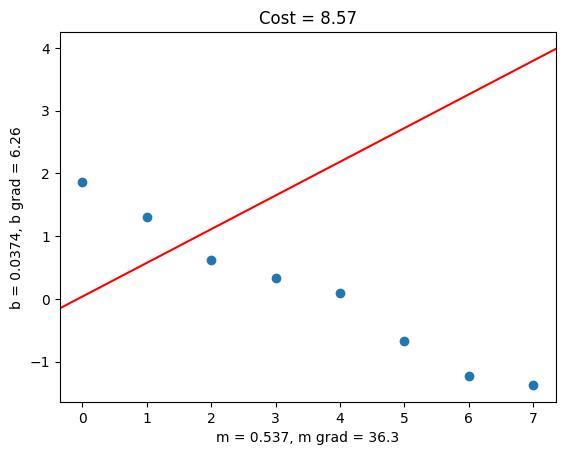

In [ ]:
labelled_regression_plot(xs,ys,m,b,C)

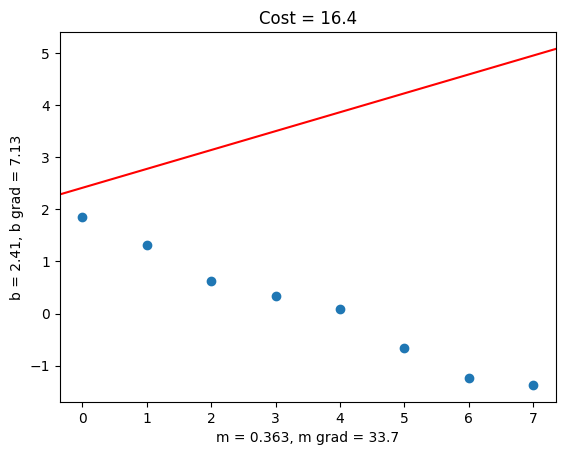

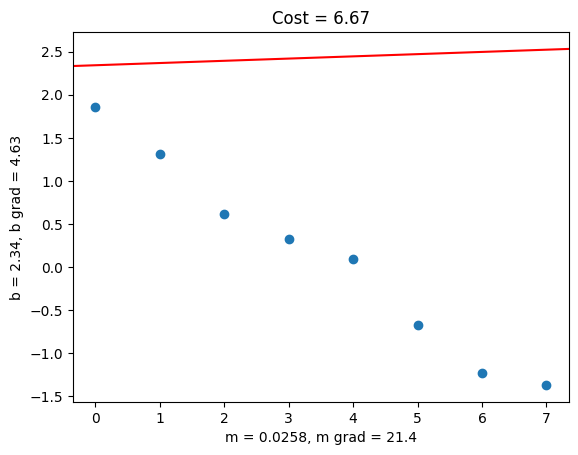

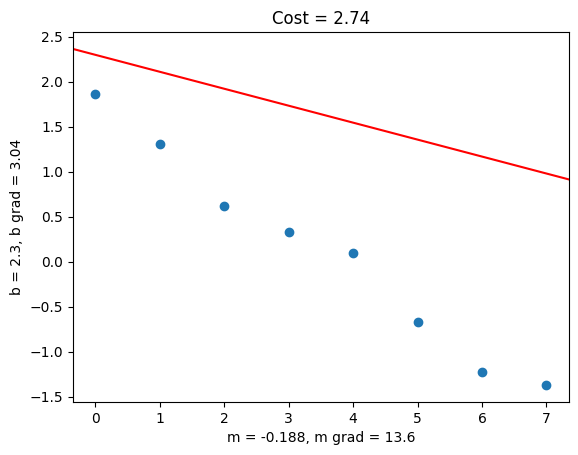

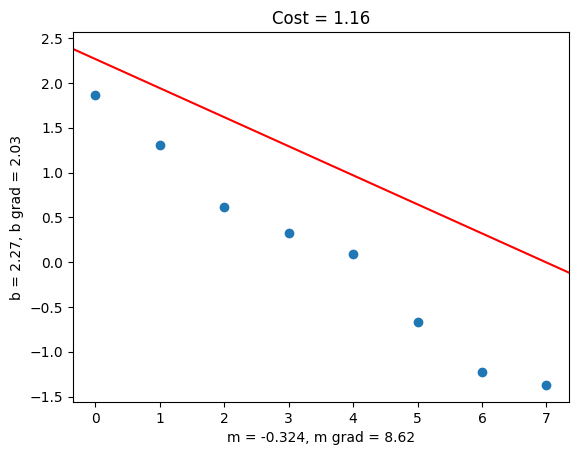

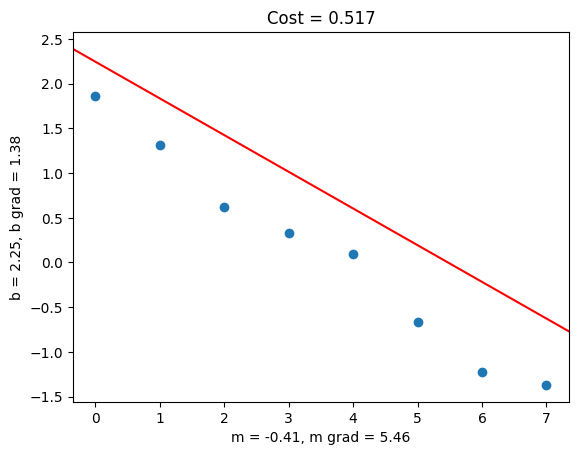

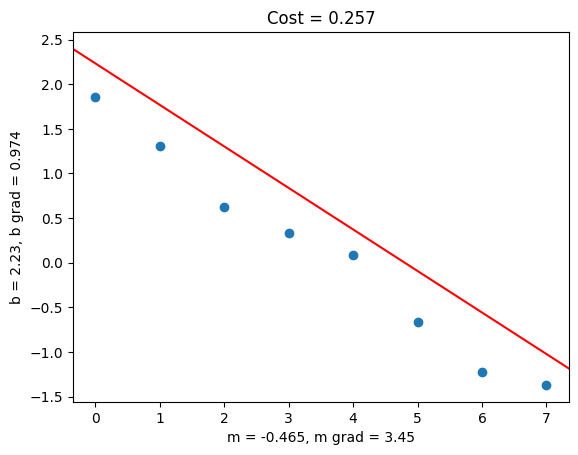

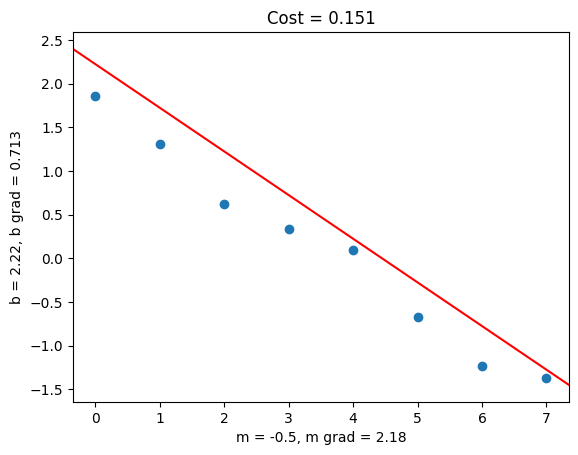

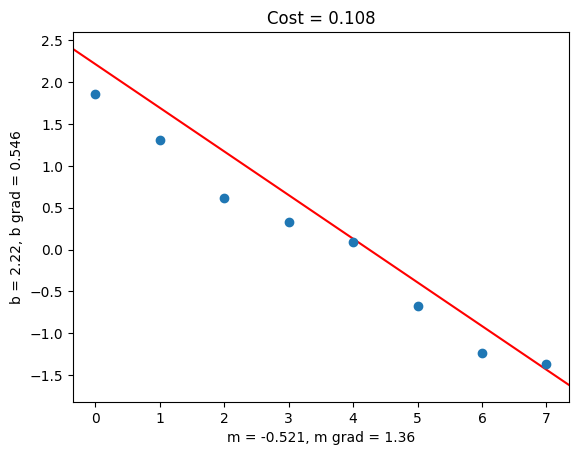

In [ ]:
# Rinse and Repeat the optimization process

epochs = 8

for epoch in range(epochs):
  optimizer.zero_grad()
  yhat = regression(xs,m,b)
  C = mse(yhat,ys)

  C.backward()

  labelled_regression_plot(xs,ys,m,b,C)
  optimizer.step()

In [ ]:
epochs = 1000

for epoch in range(epochs):
  optimizer.zero_grad()
  yhat = regression(xs,m,b)
  C = mse(yhat,ys)

  C.backward()

  # labelled_regression_plot(xs,ys,m,b,C)
  optimizer.step()

In [ ]:
C

tensor(0.0195, grad_fn=<DivBackward0>)

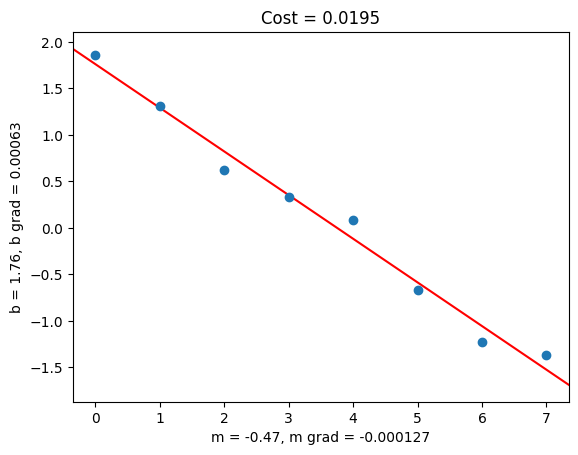

In [ ]:
labelled_regression_plot(xs,ys,m,b,C)

# Integrals

In [ ]:
from scipy.integrate import quad    # "Quadrature" = numerical Integration (As opposed to symbolic)

In [ ]:
# x = np.linspace(0,5,1000)

In [ ]:
def g(x):
  return x/2

In [ ]:
quad(g,1,2)     # the second output is an estimate of an absolute error of the integral
# First Eigen is the answer of this integration

(0.75, 8.326672684688674e-15)

In [ ]:
def h(x):
  return 2*x

In [ ]:
quad(h,3,4)

(7.0, 7.771561172376096e-14)

## Area Under ROC curve

Here we dont have a funxtion to calculate the are under the curve so we use scikit-learn's library auc() method, which uses a numerical approach to find the area under the curve described by the components

In [ ]:
from sklearn.metrics import auc

**Let the points are**:
- (0,0)
- (0,0.5)
- (0.5,0.5)
- (0.5,1)
- (1,1)

In [ ]:
xs = [0,0,0.5,0.5,1]
ys = [0,0.5,0.5,1,1]

In [ ]:
auc(xs,ys)

0.75